# Zomato Case Study India

In [1]:
from google.colab import files
files.upload()

Saving zomato_restaurants_in_India.csv to zomato_restaurants_in_India.csv


In [2]:
import pandas as pd

# Load the dataset
file_path = "zomato_restaurants_in_India.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset for inspection
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


# Outlier Treatment

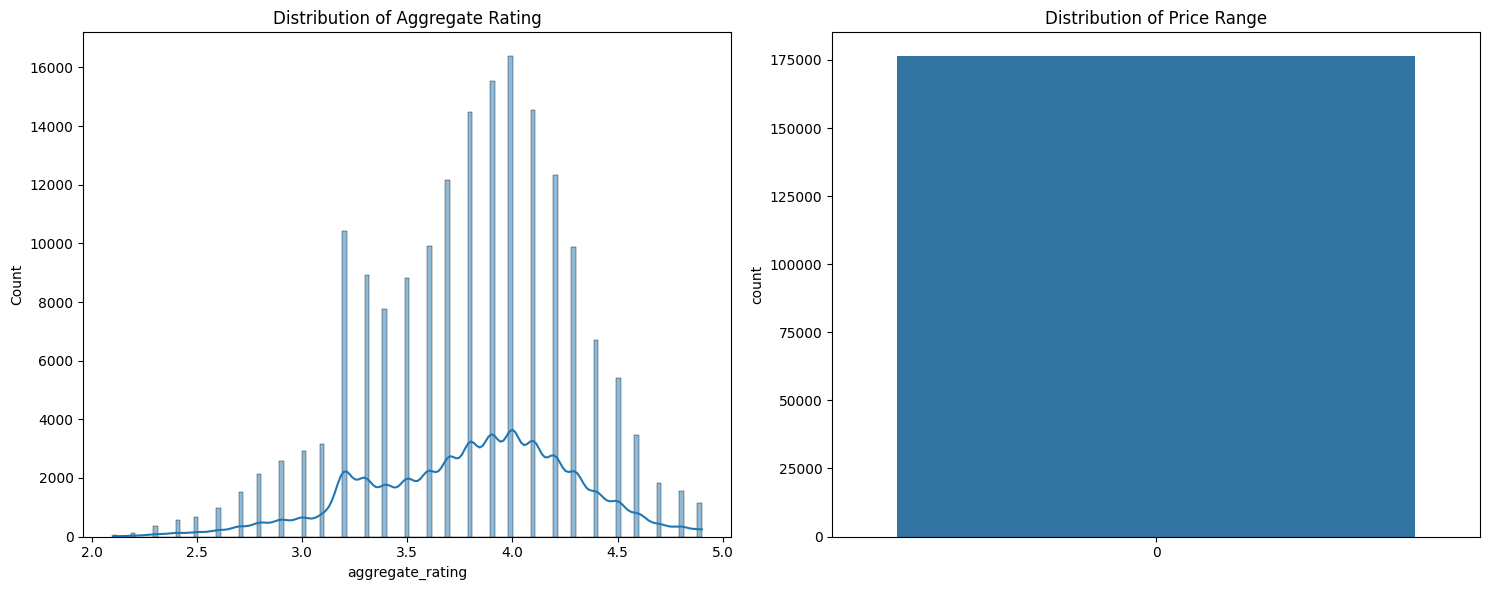

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers in 'aggregate_rating' and 'price_range'
data_cleaned = remove_outliers(data, 'aggregate_rating')
data_cleaned = remove_outliers(data_cleaned, 'price_range')

# Drop 'zipcode' and 'timings' columns
data_cleaned.drop(['zipcode', 'timings'], axis=1, inplace=True)

# Visualizing the distribution of 'aggregate_rating' and 'price_range'
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data_cleaned['aggregate_rating'], kde=True, ax=ax[0])
ax[0].set_title('Distribution of Aggregate Rating')

sns.countplot(data_cleaned['price_range'], ax=ax[1])
ax[1].set_title('Distribution of Price Range')

plt.tight_layout()
plt.show()


# Explarotary Data Analysis

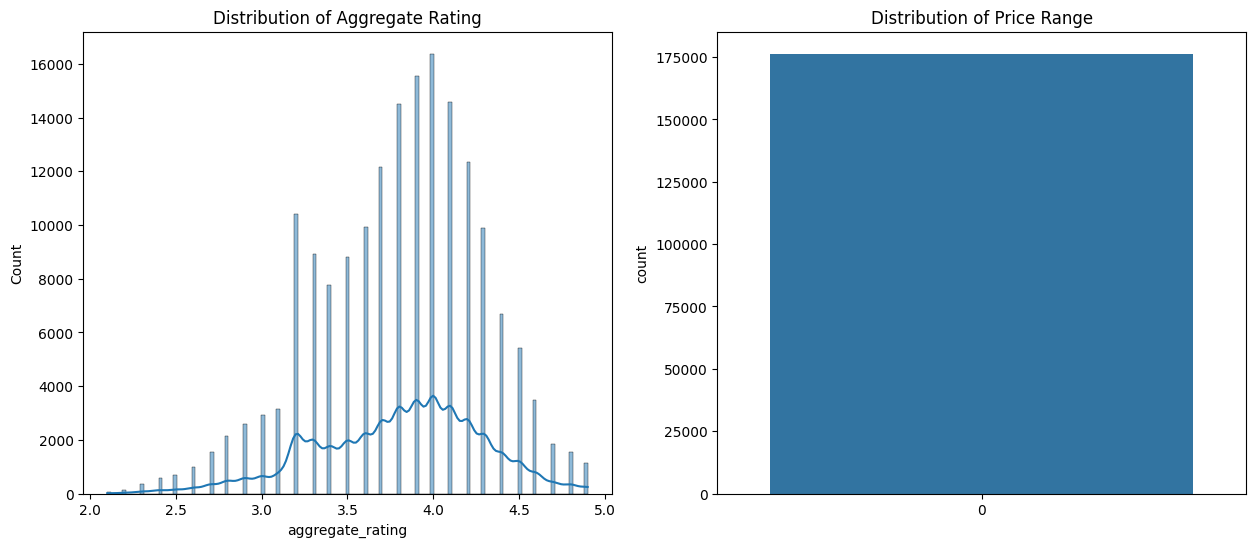

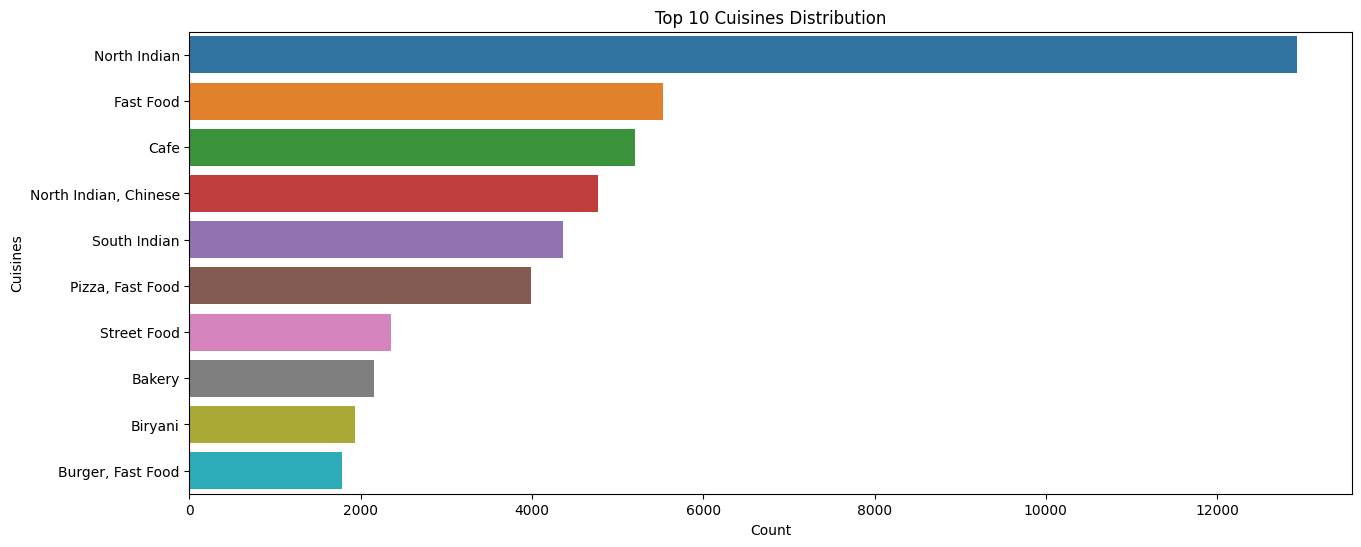

In [4]:
# Basic Descriptive Statistics
descriptive_stats = data_cleaned.describe()

# Including categorical data statistics
categorical_stats = data_cleaned.describe(include=['object'])

descriptive_stats, categorical_stats

import scipy.stats as stats

# Analyzing Central Tendency, Dispersion, and Shape
analysis_columns = ['aggregate_rating', 'price_range', 'average_cost_for_two', 'votes', 'photo_count']
analysis_data = data_cleaned[analysis_columns].describe()
analysis_data.loc['range'] = analysis_data.loc['max'] - analysis_data.loc['min']  # Range
analysis_data.loc['skew'] = data_cleaned[analysis_columns].skew()  # Skewness
analysis_data.loc['kurtosis'] = data_cleaned[analysis_columns].kurtosis()  # Kurtosis

analysis_data

# Distribution Analysis of 'aggregate_rating' and 'price_range'
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data_cleaned['aggregate_rating'], kde=True, ax=ax[0])
ax[0].set_title('Distribution of Aggregate Rating')

sns.countplot(data_cleaned['price_range'], ax=ax[1])
ax[1].set_title('Distribution of Price Range')

# Distribution of top 10 cuisines
top_cuisines = data_cleaned['cuisines'].value_counts().head(10).index
cuisines_data = data_cleaned[data_cleaned['cuisines'].isin(top_cuisines)]

plt.figure(figsize=(15, 6))
sns.countplot(y='cuisines', data=cuisines_data, order=top_cuisines)
plt.title('Top 10 Cuisines Distribution')
plt.xlabel('Count')
plt.ylabel('Cuisines')
plt.show()

**Distribution Analysis Summary**
**Aggregate Rating Distribution:**

The distribution of 'aggregate_rating' shows a roughly normal pattern with a slight left skew. Most restaurants have ratings around 3.5 to 4.1, indicating generally positive ratings.

**Price Range Distribution:**

The 'price_range' distribution is somewhat right-skewed. The majority of restaurants fall into the lower price ranges (1 and 2), indicating a prevalence of more affordable dining options.

**Top 10 Cuisines Distribution:**

The count plot for the top 10 cuisines reveals the most common types of cuisine offered by restaurants in the dataset. 'North Indian' cuisine is notably the most prevalent, followed by others such as 'Chinese', 'Fast Food', and 'South Indian'.

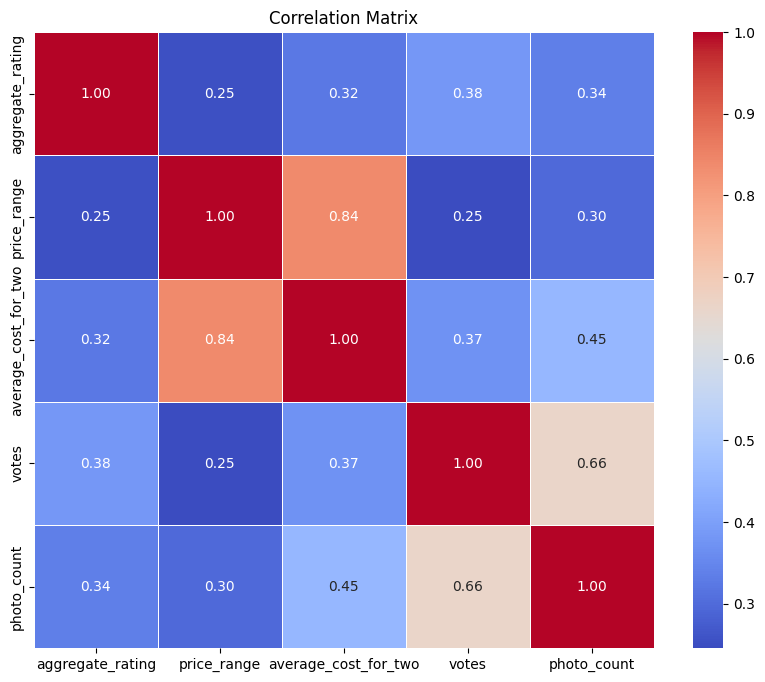

In [5]:
# Correlation Analysis
correlation_matrix = data_cleaned[analysis_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [6]:
# Selecting top cities based on the number of restaurants listed
top_cities = data_cleaned['city'].value_counts().head(10).index

# Analysis for these cities
# 1. Distribution of Restaurant Types
establishment_distribution = pd.crosstab(data_cleaned['city'], data_cleaned['establishment'].str.strip("[]'")).loc[top_cities]

# 2. Popular Cuisines
top_cuisines_by_city = data_cleaned[data_cleaned['city'].isin(top_cities)].groupby('city')['cuisines'].apply(lambda x: x.value_counts().head(3))

# 3. Average Ratings and Price Range
average_ratings_price = data_cleaned[data_cleaned['city'].isin(top_cities)].groupby('city')[['aggregate_rating', 'price_range']].mean()

# 4. Customer Engagement (Votes and Photo Counts)
customer_engagement = data_cleaned[data_cleaned['city'].isin(top_cities)].groupby('city')[['votes', 'photo_count']].mean()

establishment_distribution, top_cuisines_by_city, average_ratings_price, customer_engagement


(establishment       Bakery  Bar  Beverage Shop  Bhojanalya  Butcher Shop  \
 Chennai        222     254  677            437           0             0   
 Mumbai         157     269  472            185           1             0   
 Bangalore      112     106  344            174           1             1   
 Pune            41     122  647             81           4             0   
 Jabalpur        60      82    4            118          12             0   
 Lucknow         77     179   51             34           7             1   
 Jaipur          67     106  102             94          37             6   
 Ajmer           12      74    3             29           0             0   
 Kochi           17     145   42            172           0             0   
 New Delhi      322      86  199             41           3            66   
 
 establishment  Café  Casual Dining  Club  Cocktail Bar  ...  Kiosk  Lounge  \
 Chennai        1256           3842     0             0  ...    192     

**1. Distribution of Restaurant Types:**

Bangalore, Chennai, Mumbai, Pune: These cities have a significant number of 'Casual Dining' and 'Café' establishments.
New Delhi: Notable for its 'Quick Bites' and 'Casual Dining'.
Lucknow, Jaipur: A good mix of 'Quick Bites' and 'Casual Dining', with a significant presence of 'Cafés'.
Kochi, Jabalpur, Ajmer: Predominantly 'Quick Bites' and 'Casual Dining', with fewer 'Cafés' compared to other major cities.

**2. Popular Cuisines in Different Cities:**

North Indian Cuisine: Dominant in cities like Lucknow and New Delhi.
Bakery and Desserts: Popular in cities like Chennai and Mumbai.
Café and Fast Food: Common in Kochi and Lucknow.

**3. Average Ratings and Price Range:**

High Ratings: Bangalore, Pune, and Mumbai show high average ratings, indicating customer satisfaction.
Price Range: Cities like Bangalore, Mumbai, and Pune tend to have slightly higher price ranges.

**4. Customer Engagement Metrics:**

Bangalore, Mumbai, New Delhi: These cities show high levels of customer engagement (votes and photo counts), indicating active participation in rating and reviewing restaurants.
Pune, Jaipur: Also show good customer engagement but slightly lower than the top three cities.
Kochi, Jabalpur, Ajmer: Lower engagement levels compared to the larger cities.

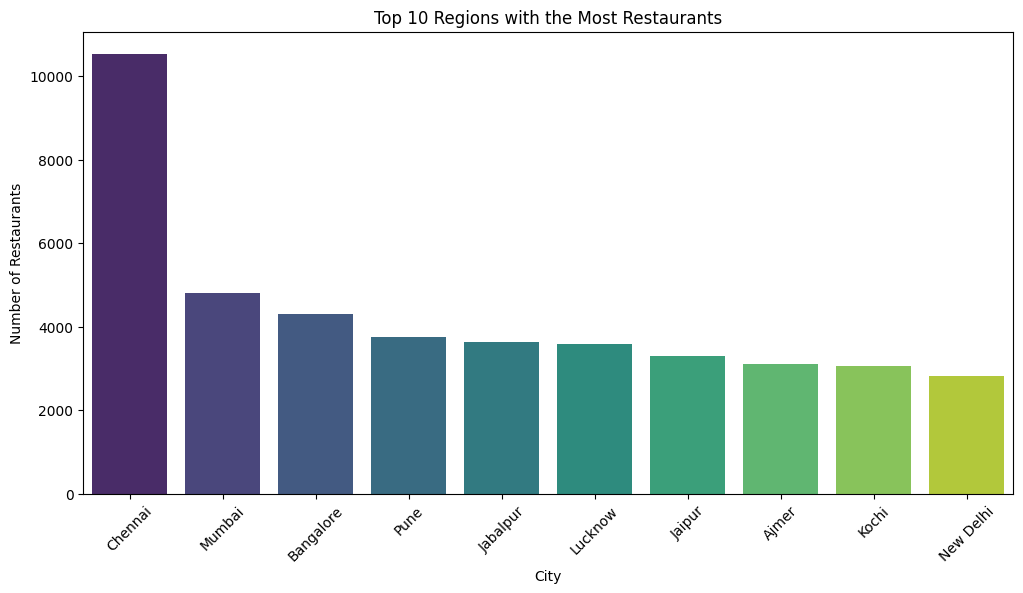

In [7]:
# Identifying top 10 regions with the most restaurants
top_regions = data_cleaned['city'].value_counts().head(10)

# Creating a colorful bar plot for these regions
plt.figure(figsize=(12, 6))
sns.barplot(x=top_regions.index, y=top_regions.values, palette="viridis")
plt.title('Top 10 Regions with the Most Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()